<a href="https://colab.research.google.com/github/meet-2719/ML-sem5/blob/master/ML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [0]:
#Question 1.1
#l_theta = theta**2
init_theta = np.random.rand();


In [0]:
def gradientdescent (theta, alpha, iterations):
    for i in range(iterations):
      theta = theta - alpha*(2*theta)
    return theta
    

In [0]:
thet = gradientdescent(init_theta, 0.01,10000)
print(thet)

8.702765699400488e-89


In [0]:
thet = gradientdescent(init_theta, 0.1,10000)
print(thet)

1e-323


In [0]:
#Question 1.2
#l_theta = theta**2
theta1 = np.random.rand(2,1)



In [0]:
def gradientdescent (theta, alpha, iterations):
    for i in range(iterations):
      theta = theta - alpha*(2*theta)
    return theta

In [0]:
thet = gradientdescent(theta1, 0.01,10000)
print(thet)

[[1.66563068e-88]
 [1.22891012e-88]]


In [0]:
thet = gradientdescent(theta1, 0.1,10000)
print(thet)

[[1.e-323]
 [1.e-323]]


In [0]:
#Question 1.3
#l_theta = (theta-1)**2
init_theta = np.random.rand();

In [0]:
def gradientdescent (theta, alpha, iterations):
    for i in range(iterations):
      theta = theta - alpha*(2*(theta-1))
    return theta

In [0]:
thet = gradientdescent(init_theta, 0.01,10000)
print(thet)

0.9999999999999973


In [0]:
thet = gradientdescent(init_theta, 0.1,10000)
print(thet)

0.9999999999999998


In [0]:
#Question 1.4
#l_theta = 2*(theta_1 - 1)**2 + 2*(theta_1 - 1)**2
theta1 = np.random.rand(2,1)

In [0]:
def gradientdescent (theta, alpha, iterations):
    for i in range(iterations):
      theta = theta - alpha*(2*(theta-1))
    return theta

In [0]:
thet = gradientdescent(theta1, 0.01,10000)
print(thet)

[[1.]
 [1.]]


In [0]:
thet = gradientdescent(theta1, 0.1,10000)
print(thet)

[[1.]
 [1.]]


In [0]:
#Question 1.5
#l_theta = 2*(theta_1 - 1)**2 + 2*(theta_1 - 1)**2
theta1 = np.random.rand(2,1)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data for Problem1.csv to data for Problem1.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['data for Problem1.csv']))

In [0]:
df2.head()
x = df2['x']
x = (x-np.mean(x))/np.std(x)
y = df2['y']
print(x.shape)
print(y.shape)

(94,)
(94,)


In [0]:
o = np.ones((x.shape[0],1))
X = np.column_stack((o, x))
y=y.values
y = y.reshape((94, 1))
print(X.shape)
print(y.shape)

(94, 2)
(94, 1)


In [0]:
theta1 = np.random.rand(2,1)
m = X.shape[0]
def gradientdescent (theta, alpha, iterations, X, y):
    for i in range(iterations):
      x1 = y - np.matmul(X,theta)
      x2 = np.matmul(X.transpose(),x1)
      theta = theta + (alpha/m)*x2
    return theta

In [0]:
theta1 = np.random.rand(2,1)
thet = gradientdescent(theta1, 0.01,10000, X, y)
print(thet)

[[23.71808511]
 [-6.86699545]]


In [0]:
#Question 2
theta1 = np.random.rand(2,1)
def gradientdescent (theta, alpha, iterations, X, y):
    for i in range(iterations):
      #c = int (np.round(np.random.rand()*94-1))
      c = np.random.randint(0,93)
      var = X[c,:]
      var = var.reshape(1,2)
      x1 = y[c,:] - np.matmul(var,theta)
      x2 = (var.transpose()*x1)
      theta = theta + (alpha)*x2
    return theta

In [0]:
theta1 = np.random.rand(2,1)
m = X.shape[0]
#print(theta1.shape)
thet = gradientdescent(theta1, 0.1,10000, X, y)
#print(thet.shape)
print(thet)

[[25.30586734]
 [-7.96722715]]


In [0]:
#Question 3a
def cost(theta):
    return theta ** 2;

In [0]:
def cost_derivative(theta):
    t_d = np.matrix(np.zeros(theta.shape));
    t_d[0] = 2 * theta;
    return (t_d);

In [0]:
def cost_double_derivative(theta):
    t_d = np.matrix(np.zeros(theta.shape));
    t_d[0] = 2;
    return (t_d);

In [0]:
def cost_alpha(alpha, theta_0): #The function to minimize alpha by Newton's Method - It is the cost function at theta_0 keeping alpha as variable
    return cost(theta_0 - alpha * cost_derivative(theta_0));

In [0]:
def cost_derivative_alpha(alpha, theta):
    return -4 * (1 - 2 * alpha) * theta * theta;

In [0]:
def cost_double_derivative_alpha(alpha, theta):
    return 8 * theta * theta;

[[0.]]


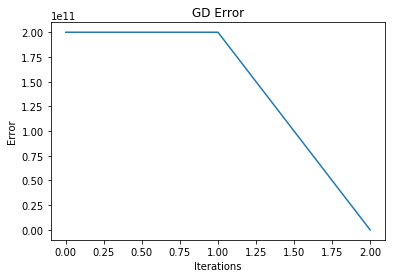

In [0]:
theta_0 = np.matrix([10000]).T;
theta =  theta_0;
alpha = 10000000;
error = 1;
errorvec = np.array([ ]);
while abs(error) > 0.0001 : 
    old_theta = theta;
    theta = theta - alpha * cost_derivative(theta);
    error = sum(old_theta - theta);
    errorvec = np.append(errorvec, abs(error));
    #Steepest
    old_alpha = alpha;
    alpha = alpha - cost_derivative_alpha(alpha, theta_0) / cost_double_derivative_alpha(alpha, theta_0);
    #
print(theta);
plt.plot(errorvec);
plt.xlabel('Iterations');
plt.ylabel('Error');
plt.title('GD Error');

In [0]:
#Question 3b
def cost_derivative(theta):
    t_d = np.matrix(np.zeros(theta.shape));
    t_d[1] = 2 * theta[1];
    t_d[0] = 2 * theta[0];
    return (t_d);

In [0]:
def der_alpha(theta, alp):
    p = theta - alp * cost_derivative(theta);
    #print(p);
    J = np.sum(np.square(p));
    #print(J);
    Jd = Derivative(J, alp);
    return Jd;

In [0]:
def der_2_alpha(theta, alp):
    Jd = der_alpha(theta, alp);
    Jdd = Derivative(Jd, alp);
    #print(Jdd);
    return Jdd;

[12000000.0 11994000.0000000 0]
[[0]
 [0]]


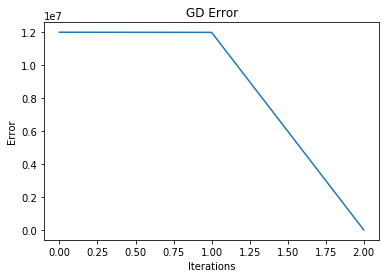

In [0]:
from sympy import Symbol, Derivative
theta_0 = np.matrix([3000, 3000]).T;
theta = theta_0;
alpha = 1000;
alp = Symbol('alp');
error = 1;
errorvec = np.array([ ]);
while abs(error) > 0.01:
    old_theta = theta;
    theta = theta - alpha * cost_derivative(theta);
    error = sum(old_theta - theta);
    errorvec = np.append(errorvec, abs(error));
    alpha = alpha - (der_alpha(theta_0, alp).doit()/np.array(der_2_alpha(theta_0, alp).doit())).subs({alp:alpha});

print(errorvec);
print(theta);
plt.plot(errorvec);
plt.xlabel('Iterations');
plt.ylabel('Error');
plt.title('GD Error');

In [0]:
#Question 3e
print(X.shape)
print(y.shape)
print(theta.shape)
print((X[:,1]).shape)
z = X[:,1]
z=z.reshape((94,1))
print(z.shape)
print(((X * theta - y).transpose() * np.array(z)).shape)
      
def cost_derivative(theta):
    t_d = np.matrix(np.zeros(theta.shape));
    t_d[1] = sum(((X * theta - y).transpose() * np.array(z)));
    t_d[0] = sum(X * theta - y);
    return (t_d);

(94, 2)
(94, 1)
(2, 1)
(94,)
(94, 1)
(1, 1)


In [0]:
def der_alpha(theta, alp):
    p = theta - alp * cost_derivative(theta);
    #print(p);
    J = np.sum(np.square((X * p - y)) );
    Jd = Derivative(J, alp);
    #print(Jd);
    return Jd;

In [0]:
def der_2_alpha(theta, alp):
    Jd = der_alpha(theta, alp);
    Jdd = Derivative(Jd, alp);
    return Jdd;

[562415997.5720417 562410014.422748 0.000383618268374519]
[[23.7180851063830]
 [-6.86699544725538]]


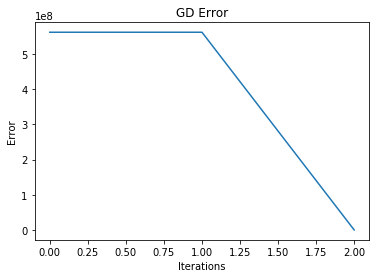

In [0]:
from sympy import Symbol, Derivative
theta_0 = np.matrix([3000, 3000]).T;
theta = theta_0;
alpha = 1000;
alp = Symbol('alp');
error = 1;
errorvec = np.array([ ]);
while abs(error) > 0.01:
    old_theta = theta;
    theta = theta - alpha * cost_derivative(theta);
    error = sum(old_theta - theta);
    errorvec = np.append(errorvec, abs(error));
    alpha = alpha - (der_alpha(theta_0, alp).doit()/der_2_alpha(theta_0, alp).doit()).subs({alp:alpha});
print(errorvec);
print(theta);
plt.plot(errorvec);
plt.xlabel('Iterations');
plt.ylabel('Error');
plt.title('GD Error');